# Titanic Model Evaluation
By: Arhym

Last update: Oct 14, 2022

In [2]:
install.packages("titanic")
library(titanic)
library(tidyverse)
library(dplyr)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
Warning message:
“Failed to locate timezone database”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()  masks stats::filter()
✖ purrr::flatten() masks jsonlite::flatten()
✖ dplyr::lag()     masks stats::lag()



In [15]:
## prep data ##
glimpse(Titanic)
glimpse(titanic_train)

# remove NA
titanic_train <- na.omit(titanic_train)

# change data type
titanic_train$Survived <- factor(titanic_train$Survived,
                                 levels = c(0,1),
                                 labels = c("Died", "Survived"))
class(titanic_train$Survived)
table(titanic_train$Survived)

titanic_train$Pclass <- factor(titanic_train$Pclass,
                               levels = c(1,2,3))
class(titanic_train$Pclass)
table(titanic_train$Pclass)

titanic_train$Sex <- factor(titanic_train$Sex,
                            levels = c("male","female"))
class(titanic_train$Sex)
table(titanic_train$Sex)

 'table' num [1:4, 1:2, 1:2, 1:2] 0 0 35 0 0 0 17 0 118 154 ...
 - attr(*, "dimnames")=List of 4
  ..$ Class   : chr [1:4] "1st" "2nd" "3rd" "Crew"
  ..$ Sex     : chr [1:2] "Male" "Female"
  ..$ Age     : chr [1:2] "Child" "Adult"
  ..$ Survived: chr [1:2] "No" "Yes"
Rows: 714
Columns: 12
$ PassengerId <int> 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19…
$ Survived    <fct> Died, Survived, Survived, Survived, Died, Died, Died, Surv…
$ Pclass      <fct> 3, 1, 3, 1, 3, 1, 3, 3, 2, 3, 1, 3, 3, 3, 2, 3, 3, 2, 2, 3…
$ Name        <chr> "Braund, Mr. Owen Harris", "Cumings, Mrs. John Bradley (Fl…
$ Sex         <fct> male, female, female, female, male, male, male, female, fe…
$ Age         <dbl> 22, 38, 26, 35, 35, 54, 2, 27, 14, 4, 58, 20, 39, 14, 55, …
$ SibSp       <int> 1, 1, 0, 1, 0, 0, 3, 0, 1, 1, 0, 0, 1, 0, 0, 4, 1, 0, 0, 0…
$ Parch       <int> 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 0, 0, 5, 0, 0, 1, 0, 0, 0, 0…
$ Ticket      <chr> "A/5 21171", "PC 17599", "STON/O2. 3101282", "113

'factor'


    Died Survived 
       0        0 

'factor'


  1   2   3 
186 173 355 

'factor'


  male female 
   453    261 

Pclass,Survived,n
<fct>,<fct>,<int>
1,Died,64
1,Survived,122
2,Died,90
2,Survived,83
3,Died,270
3,Survived,85


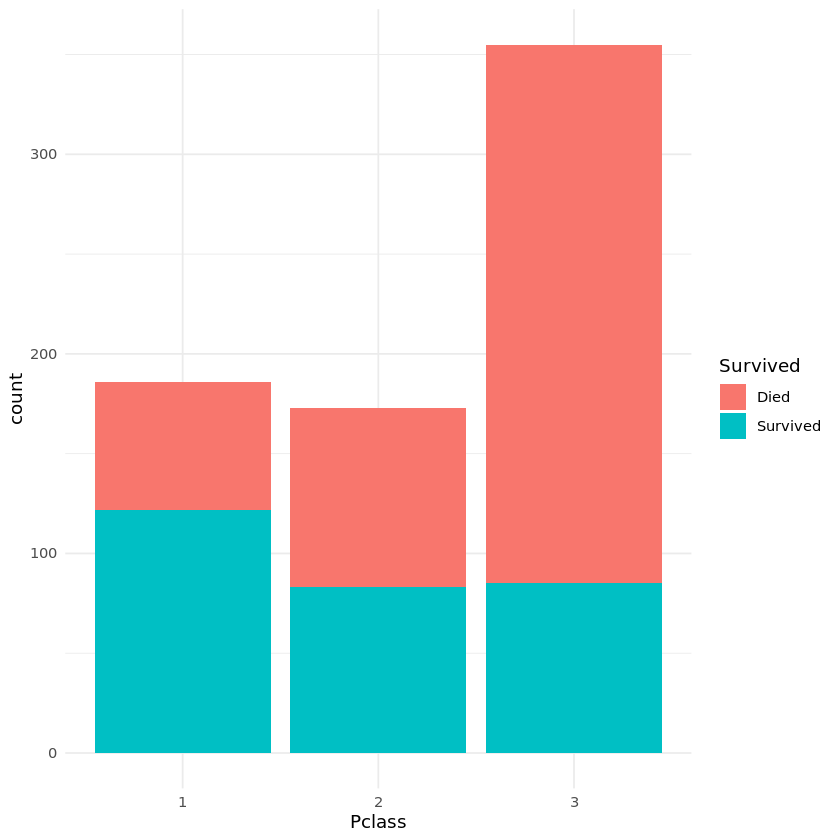

In [4]:
## visualize
titanic_train %>%
  count(Pclass,Survived)
ggplot(titanic_train, aes(Pclass, fill = Survived)) + geom_bar() + theme_minimal()

Sex,Survived,n
<fct>,<fct>,<int>
male,Died,360
male,Survived,93
female,Died,64
female,Survived,197


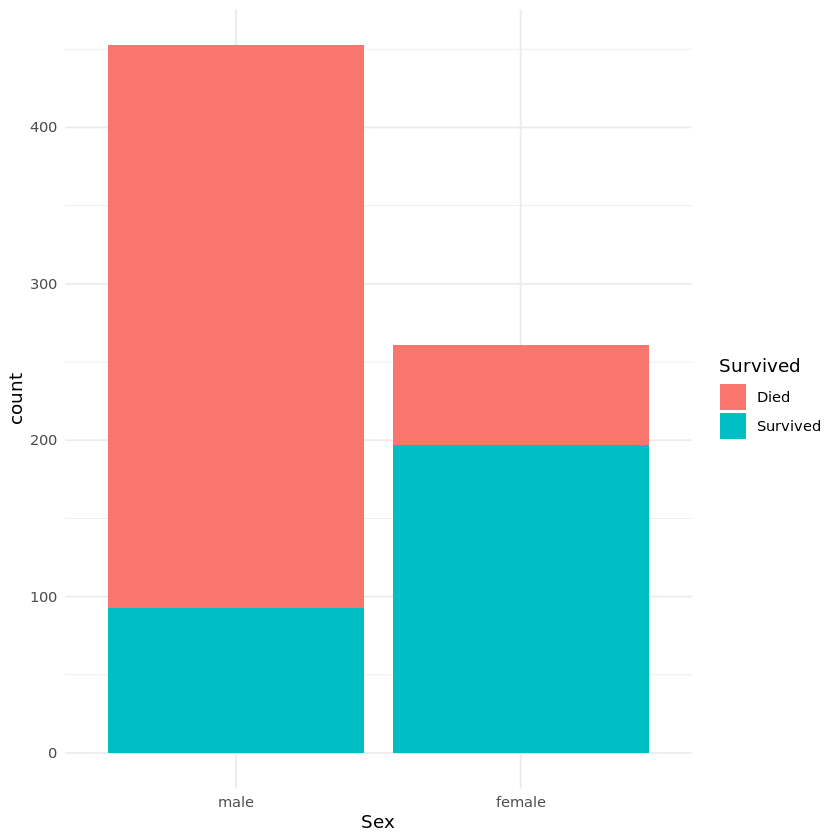

In [5]:
## visualize
titanic_train %>%
    count(Sex,Survived)
ggplot(titanic_train, aes(Sex, fill = Survived)) + geom_bar() + theme_minimal()

In [6]:
## split data
n <- nrow(titanic_train)
set.seed(89)
id <- sample(1:n, size = n*0.7) #train70:test30
train_data <- titanic_train[id, ]
test_data <- titanic_train[-id, ]

### Train Model

Mean: 0.8416834

accuracy,n
<chr>,<int>
Accurate,420
Inaccurate,79


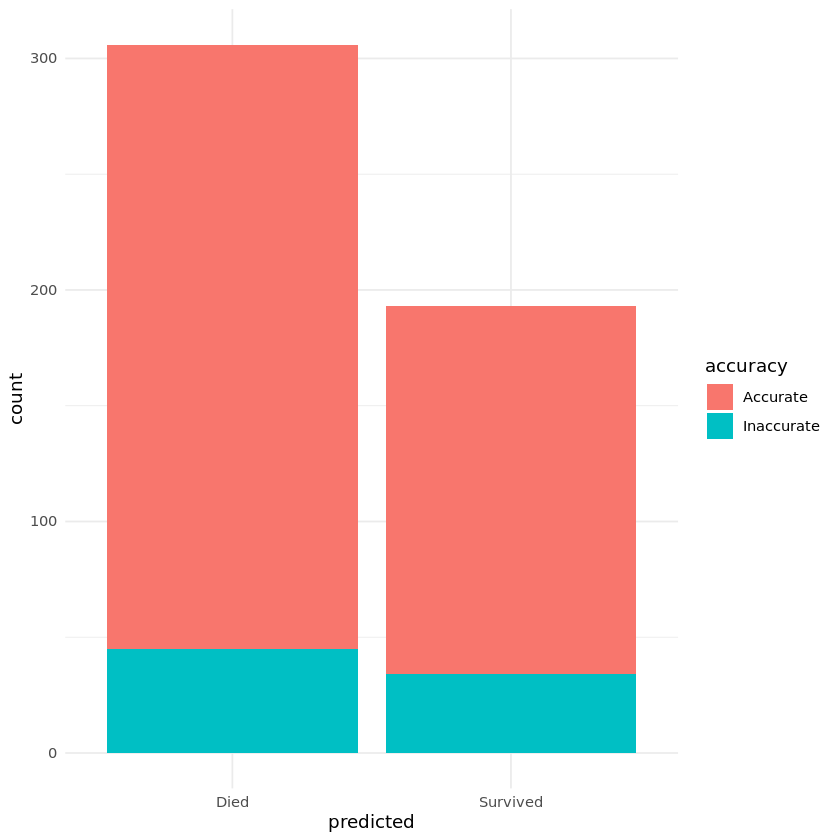

In [7]:
## fit logistic regression
logistreg_model <- glm(Survived ~ Pclass + Sex + Age + Cabin, data = train_data, family = "binomial")
#summary(logistreg_model)

## train model
predict_train <- predict(logistreg_model, type = "response") #probability
train_data$predicted <- if_else(predict_train <= 0.5, "Died", "Survived")
train_data$accuracy <- if_else(train_data$Survived == train_data$predicted, "Accurate", "Inaccurate")
cat("Mean:",mean(train_data$Survived == train_data$predicted))

##visualize
train_data %>% count(accuracy)
ggplot(train_data, aes(predicted, fill = accuracy)) + geom_bar() + theme_minimal()

### Test Model

Mean: 0.8930233

accuracy,n
<chr>,<int>
Accurate,192
Inaccurate,23


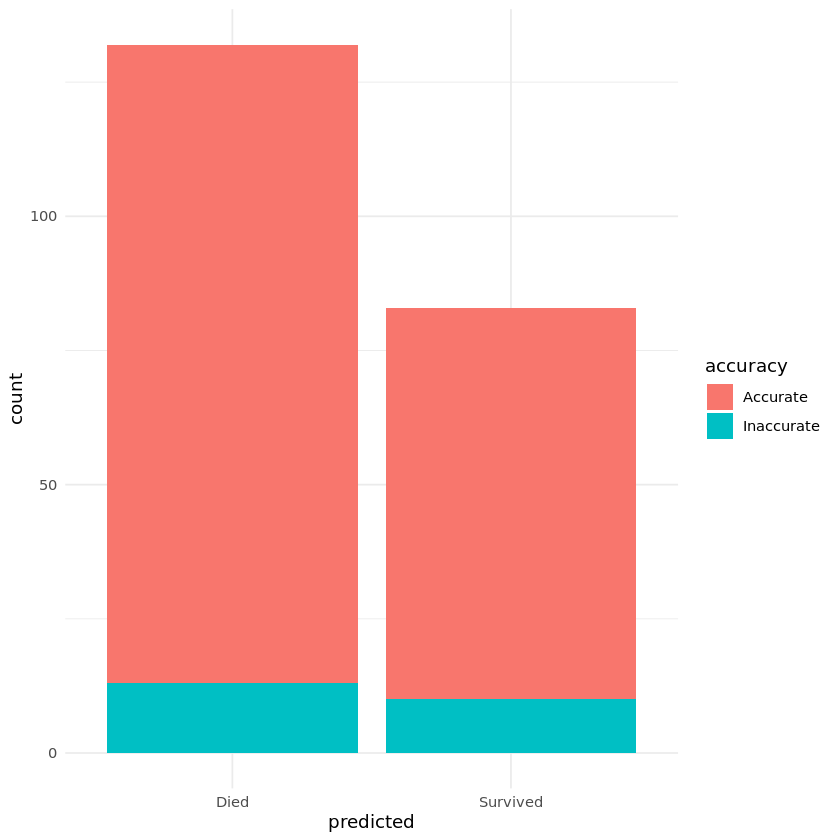

In [8]:
## test model
logistreg_modeltest <- glm(Survived ~ Pclass + Sex + Age + Cabin, data = test_data, family = "binomial")
predict_test <- predict(logistreg_modeltest, type = "response") #probability
test_data$predicted <- if_else(predict_test <= 0.5, "Died", "Survived")
test_data$accuracy <- if_else(test_data$Survived == test_data$predicted, "Accurate", "Inaccurate")
cat("Mean:", mean(test_data$Survived == test_data$predicted))

##visualize
test_data %>% count(accuracy)
ggplot(test_data, aes(predicted, fill = accuracy)) + geom_bar() + theme_minimal()

In [9]:
## mean train vs mean test 
  cat("Mean_train:", mean(train_data$Survived == train_data$predicted),
      "\nMean_test:", mean(test_data$Survived == test_data$predicted))

Mean_train: 0.8416834 
Mean_test: 0.8930233

### Model Evaluation

In [10]:
## train model evaluation
conmat_tr <- table(train_data$predicted, train_data$Survived,
                  dnn= c("Predicted", "Actual"))
conmat_tr

Actual
Predicted Died Survived
 Died 261 45
 Survived 34 159

In [11]:

cat("Train Accuracy:", (conmat_tr[[1,1]] + conmat_tr[[2,2]]) / sum(conmat_tr),
    "\nTrain Precision:",conmat_tr[[2,2]] / (conmat_tr[[2,2]] + conmat_tr[[2,1]]),
    "\nTrain Recall:",conmat_tr[[2,2]] / (conmat_tr[[2,2]] + conmat_tr[[1,2]]),
    "\nTrain F1 Score:", 2 * ((0.8238342 * 0.7794118) / (0.8238342 + 0.7794118)))

Train Accuracy: 0.8416834 
Train Precision: 0.8238342 
Train Recall: 0.7794118 
Train F1 Score: 0.8010076

In [12]:
## test model evaluation
conmat_ts <- table(test_data$predicted, test_data$Survived,
                   dnn= c("Predicted", "Actual"))
conmat_ts

Actual
Predicted Died Survived
 Died 119 13
 Survived 10 73

In [13]:
cat("Test Accuracy:", (conmat_ts[[1,1]] + conmat_ts[[2,2]]) / sum(conmat_ts),
    "\nTest Precision:",conmat_ts[[2,2]] / (conmat_ts[[2,2]] + conmat_ts[[2,1]]),
    "\nTest Recall:",conmat_ts[[2,2]] / (conmat_ts[[2,2]] + conmat_ts[[1,2]]),
    "\nTest F1 Score:", 2 * ((0.8795181 * 0.8488372) / (0.8795181 + 0.8488372)))

Test Accuracy: 0.8930233 
Test Precision: 0.8795181 
Test Recall: 0.8488372 
Test F1 Score: 0.8639053

### Summary

In [14]:
## summary
Train <- data.frame(Model = "Train", Mean = 0.8416834, Accuracy = 0.8416834, Precision = 0.8238342, Recall = 0.7794118,F1Score = 0.8010076)
Test <- data.frame(Model = "Test", Mean = 0.8930233, Accuracy = 0.8930233, Precision = 0.8795181, Recall = 0.8488372 , F1Score = 0.8639053)
tibble(summary <- bind_rows(Train,Test))

Model,Mean,Accuracy,Precision,Recall,F1Score
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Train,0.8416834,0.8416834,0.8238342,0.7794118,0.8010076
Test,0.8930233,0.8930233,0.8795181,0.8488372,0.8639053
